<a href="https://colab.research.google.com/github/realyou0312/Bigdata-Gisa/blob/main/JY_Kaggle_Credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings(action='ignore')

In [7]:
df = pd.read_csv('/content/drive/MyDrive/빅분기 실기/Kaggle_Credit_분류/creditcard.csv')
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [8]:
  df_copy = df.copy()
  df_copy.drop('Time', axis=1, inplace=True)

In [11]:
X_features = df_copy.iloc[:, :-1]
y_target = df_copy.iloc[:, -1]
# stratify=y_target으로 Stratified 기반 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42, stratify=y_target)

In [12]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [15]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차 행렬
[[56850    14]
 [   33    65]]
정확도: 0.9992, 정밀도: 0.8228, 재현율: 0.6633,    F1: 0.7345, AUC:0.9419


In [38]:
print('### XGB 예측 성능 ###')
xgb_clf = XGBClassifier(n_estimators=1000)
xgb_clf.fit(X_train, y_train)
xgb_pred = xgb_clf.predict(X_test)
xgb_pred_proba = xgb_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, xgb_pred, xgb_pred_proba)

오차 행렬
[[56857     7]
 [   17    81]]
정확도: 0.9996, 정밀도: 0.9205, 재현율: 0.8265,    F1: 0.8710, AUC:0.9820


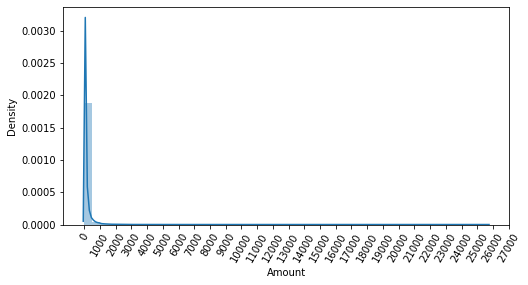

In [3]:
plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.distplot(card_df['Amount'])

## 시도1. 정규화

In [39]:
df_copy = df.copy()
scaler = StandardScaler()
amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))
df_copy.insert(0, 'Amount_Scaled', amount_n)
df_copy.drop(['Time','Amount'], axis=1, inplace=True)# 기존 Time, Amount 피처 삭제

In [40]:
X_features = df_copy.iloc[:, :-1]
y_target = df_copy.iloc[:, -1]
# stratify=y_target으로 Stratified 기반 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42, stratify=y_target)

In [28]:

print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, lr_pred, lr_pred_proba)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[56851    13]
 [   34    64]]
정확도: 0.9992, 정밀도: 0.8312, 재현율: 0.6531,    F1: 0.7314, AUC:0.9559


In [41]:
print('### XGB 예측 성능 ###')
xgb_clf = XGBClassifier(n_estimators=1000)
xgb_clf.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)],
            early_stopping_rounds=100, verbose=100,)
xgb_pred = xgb_clf.predict(X_test)
xgb_pred_proba = xgb_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, xgb_pred, xgb_pred_proba)

[0]	validation_0-error:0.000658	validation_1-error:0.000772
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 100 rounds.
[100]	validation_0-error:0.000329	validation_1-error:0.000509
[200]	validation_0-error:0.00025	validation_1-error:0.000527
Stopping. Best iteration:
[110]	validation_0-error:0.000325	validation_1-error:0.000474

오차 행렬
[[56856     8]
 [   19    79]]
정확도: 0.9995, 정밀도: 0.9080, 재현율: 0.8061,    F1: 0.8541, AUC:0.9730


## 시도2.로그변환

In [42]:
df_copy = df.copy()
amount_n = np.log1p(df_copy['Amount'])
df_copy.insert(0, 'Amount_Scaled', amount_n)
df_copy.drop(['Time','Amount'], axis=1, inplace=True)

In [43]:
X_features = df_copy.iloc[:, :-1]
y_target = df_copy.iloc[:, -1]
# stratify=y_target으로 Stratified 기반 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42, stratify=y_target)

In [44]:
print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, lr_pred, lr_pred_proba)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[56851    13]
 [   34    64]]
정확도: 0.9992, 정밀도: 0.8312, 재현율: 0.6531,    F1: 0.7314, AUC:0.9561


In [45]:
print('### XGB 예측 성능 ###')
xgb_clf = XGBClassifier(n_estimators=1000)
xgb_clf.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)],
            early_stopping_rounds=100, verbose=100,)
xgb_pred = xgb_clf.predict(X_test)
xgb_pred_proba = xgb_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, xgb_pred, xgb_pred_proba)

[0]	validation_0-error:0.000658	validation_1-error:0.000772
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 100 rounds.
[100]	validation_0-error:0.000329	validation_1-error:0.000509
[200]	validation_0-error:0.00025	validation_1-error:0.000527
Stopping. Best iteration:
[110]	validation_0-error:0.000325	validation_1-error:0.000474

오차 행렬
[[56856     8]
 [   19    79]]
정확도: 0.9995, 정밀도: 0.9080, 재현율: 0.8061,    F1: 0.8541, AUC:0.9730


## 이상치 제거

In [49]:
corr = df.corr()

In [50]:
def get_outlier(df=None, column=None, weight=1.5):
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함. 
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함. 
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    # 최대값 보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환. 
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

In [51]:
outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index)

이상치 데이터 인덱스: Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [52]:
df_copy = df.copy()
amount_n = np.log1p(df_copy['Amount'])
df_copy.insert(0, 'Amount_Scaled', amount_n)
df_copy.drop(['Time','Amount'], axis=1, inplace=True)
# 이상치 데이터 삭제하는 로직 추가
outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5)
df_copy.drop(outlier_index, axis=0, inplace=True)

In [53]:
X_features = df_copy.iloc[:, :-1]
y_target = df_copy.iloc[:, -1]
# stratify=y_target으로 Stratified 기반 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42, stratify=y_target)

In [54]:
print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, lr_pred, lr_pred_proba)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[56851    12]
 [   33    65]]
정확도: 0.9992, 정밀도: 0.8442, 재현율: 0.6633,    F1: 0.7429, AUC:0.9911


In [55]:
print('### XGB 예측 성능 ###')
xgb_clf = XGBClassifier(n_estimators=1000)
xgb_clf.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)],
            early_stopping_rounds=100, verbose=100,)
xgb_pred = xgb_clf.predict(X_test)
xgb_pred_proba = xgb_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, xgb_pred, xgb_pred_proba)

### XGB 예측 성능 ###
[0]	validation_0-error:0.000685	validation_1-error:0.000685
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 100 rounds.
[100]	validation_0-error:0.00036	validation_1-error:0.000492
[200]	validation_0-error:0.000272	validation_1-error:0.000421
Stopping. Best iteration:
[130]	validation_0-error:0.000325	validation_1-error:0.000386

오차 행렬
[[56856     7]
 [   15    83]]
정확도: 0.9996, 정밀도: 0.9222, 재현율: 0.8469,    F1: 0.8830, AUC:0.9912
